Ngram function from: https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python/

In [35]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import operator

In [36]:
# This package is so we can parse out "stop words". Words like "the", "and", etc.
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from string import punctuation 
import re
# nltk.download('stopwords')

In [37]:
def get_Unique_Values(repeating, df_columnName):
    unique_users_df = repeating.drop_duplicates(subset= df_columnName)
    return unique_users_df

In [38]:
# read csv file into a pandas dataframe
p_df = pd.read_csv('p_mergeTitleContent.csv', index_col=False)
c_df = pd.read_csv('c_CleanContent.csv', index_col=False)
# comm_df = pd.read_csv('UnDir_Comm.csv', index_col=False)


In [39]:
display(len(p_df))
display(p_df.head(3))

post_unique = get_Unique_Values(p_df, "id")
display(len(p_df))

1958

,id,content,author,post_score,Weight,new_Community,Comm_size
0,10y47g3,Finally got my driver's license again!! Wooton...,Sleight-Code,78,1,3,1530
1,10y27vy,Spent first night unprepared for cold thunders...,negamoonspoon,17,1,3,1530
2,10xy695,58-year-old homeless man Lee Stewart died afte...,Morbid_Ways_To_Die,105,1,3,1530


1958

In [40]:
display(len(c_df))
display(c_df.head(3))

comment_unique = get_Unique_Values(c_df, "comment_id")
display(len(comment_unique))

6019

,comment_id,content,source,target,post_score,comment_score,Weight,new_Community,Comm_size
0,j7w1hrz,Congratulations and best of luck to you!,ynotfoster,Sleight-Code,78,6,1,3,1530
1,j7x0e1e,Congrats! That’s a huge accomplishment. Feel g...,punktilend,Sleight-Code,78,5,1,3,1530
2,j7wr67b,This is the way!!,Jamesfishes,Sleight-Code,78,4,1,3,1530


6019

In [41]:
display(len(comm_df))
display(comm_df.head(3))

NameError: name 'comm_df' is not defined

In [42]:
post_df = p_df.copy()
comment_dp = c_df.copy()

In [43]:
comment_dp.drop(columns=['target', 'post_score'], inplace = True)
comment_dp.rename(columns={'source': 'author','comment_id': 'id', 'comment_score': 'score'}, inplace=True)
comment_dp.head(10)

,id,content,author,score,Weight,new_Community,Comm_size
0,j7w1hrz,Congratulations and best of luck to you!,ynotfoster,6,1,3,1530
1,j7x0e1e,Congrats! That’s a huge accomplishment. Feel g...,punktilend,5,1,3,1530
2,j7wr67b,This is the way!!,Jamesfishes,4,1,3,1530
3,j7x7biw,HUGE win!,Desperate-Long359,4,1,3,1530
4,j7ybryr,Congratulations!,InPredicament4ever,1,1,3,1530
5,j7zr1kq,Congratulations! No small victory but one of m...,Cool_Jackfruit_4466,1,1,3,1530
6,j82ysek,How did you get a license without a legal addr...,Endless_Story94,1,1,3,1530
7,j85wyxs,There are some charities that revolve around g...,glockster19m,1,1,3,1530
8,j82rhyx,I feel for you. Sorry you’re going through this 😞,Bigmtnskier91,1,2,3,1530
9,j7w1d4j,I hope you tell him that he is a POS for not g...,ynotfoster,2,1,3,1530


In [44]:
post_df.rename(columns={'post_score': 'score'}, inplace=True)
post_df.head(1)

,id,content,author,score,Weight,new_Community,Comm_size
0,10y47g3,Finally got my driver's license again!! Wooton...,Sleight-Code,78,1,3,1530


In [45]:
content_df = post_df.append(comment_dp, ignore_index=True)
print(len(content_df))
# content_df.to_csv('mergePostComCommTitle.csv', index=False)

7977


C:\Users\faii_\AppData\Local\Temp\ipykernel_16184\2097725865.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  content_df = post_df.append(comment_dp, ignore_index=True)


In [329]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

In [54]:
# This function will parse our tweets into "ngrams". These can be single words (1-grams), pairs (2-grams), 
# or any length of sets of words.
import nltk
# nltk.download('wordnet')
# nltk.download('omw')
# nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

# initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
tokenizer = TweetTokenizer()

def generate_N_grams(text,ngram=1):
    
    # check if text is NaN
    if type(text) != str:
        return ""
    
    text = re.sub(r'(https?://\S+)', '', text)  # replace URL with space
    text = re.sub('@[^\s]+', 'AT_USER', text) # remove usernames
#     text = re.sub(r'#([^\s]+)', r'\1', text) # remove the # in #hashtag
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower() # convert text to lower-case
    text = tokenizer.tokenize(text) 
    # lemmatize each word and add to a new list
#     text = [lemmatizer.lemmatize(word) for word in text]
    stop_words = set(stopwords.words('english') + list(punctuation) + ['see', 'th','thank', 'new','better', 'half','instead','dealt','theyd','cats','lights','took','right','state', 'last','first', 'everyone','anyone', 'somewhere', 'see','im','wagon', 'ability','currently','mission','illegal' ,'wouldnt','wa','two', 'point', 'able' ,'town','times','due', 'week' ,'behind','local' ,'someone','sorry' ,'full', '330am','used', 'extremely','lol', 'gets','afterwards','next', 'kept','sure', 'said', 'gave','today','maybe','thought','let','taking', 'couple','head', 'telling','ur','couldnt','years','particularly','guess','seemed','8th','trunk', 'whatever','hi', 'email','everything','day', 'almost', 'went', "couldn't",'homelessness','actually', 'think','didnt','use', 'month','meant','never','lot','cant', 'every','look', 'always','long', 'year','around', 'well', 'going','else','dont','made','doesnt', 'getting','id','thing', '','still','away', 'thats','either', 'people','whether','homeless','something','many', 'gotta', 'take','things', 'time', 'make', 'feet', 'etc', 'say','anything','theres','ever', 'much', 'really', 'much', 'nice', 'good','way', 'go' ,'since', 'come', 'keep' ,'like','guys' , 'dont', 'got', 'go','give', 'want' , 'get', 'that', 'ive', 'could', 'would', 'wont', 'back', 'know' ,'one', 'youre', 'even', "thats'", 'would', 'also','killarney', 'every theres', 'dont'] )

    words=[word for word in text if word not in stop_words and not word.isdigit()]  
    words = list(set(words))
#     print("Sentence after removing stopwords:",words)
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans = [' '.join(ngram) for ngram in temp]

    return list(ans)

In [4]:
content_df = pd.read_csv('mergePostComCommTitle.csv', index_col=False)

In [55]:
community_ngrams = {}

# Group the DataFrame by the new_community column
grouped = content_df.groupby('new_Community')

for community_id, group in grouped:
    nodes = group.index.to_list()
    ngrams_content = {}
    for node in nodes:
        # generate ngrams for node
        ind_ngrams = generate_N_grams(group.loc[node, 'content'], 2 )
       
        # count ngrams for community
        for i in ind_ngrams:
            if i in ngrams_content.keys():
                ngrams_content[i]+=1
            else:
                ngrams_content[i]=1
    
    community_ngrams[community_id] = ngrams_content



In [56]:
top_10_topics = {}
for community_id, ngrams_c_content in community_ngrams.items():
    sorted_ngrams_c_content = sorted(ngrams_c_content.items(), key=operator.itemgetter(1), reverse=True)[:15]
    top_10_topics[community_id] = sorted_ngrams_c_content
print(top_10_topics)


{0: [('merry christmas', 5), ('post dogs', 2), ('stay warm', 2), ('christmas lonely', 1), ('lonely cozy', 1), ('cozy missing', 1), ('missing camp', 1), ('camp less', 1), ('less tree', 1), ('streets watford', 1), ('watford covid', 1), ('covid uk', 1), ('hopefully freezing', 1), ('freezing far', 1), ('far enjoy', 1)], 1: [('canada seem', 1), ('seem similar', 1), ('similar recall', 1), ('recall action', 1), ('action kicks', 1), ('kicks sake', 1), ('sake far', 1), ('far law', 1), ('law hope', 1), ('hope figuring', 1), ('figuring speak', 1), ('speak countries', 1), ('countries person', 1), ('person least', 1), ('least kick', 1)], 2: [('put food', 2), ('app toilets', 1), ('toilets flush', 1), ('flush nearest', 1), ('nearest finding', 1), ('oppressive appreciated', 1), ('appreciated stay', 1), ('stay camping', 1), ('camping area', 1), ('area crash', 1), ('crash life', 1), ('life save', 1), ('save camp', 1), ('camp sign', 1), ('sign tank', 1)], 3: [('money job', 45), ('living shelter', 36), ('

In [8]:
color =['#ed5edb','#aa5c2c', '#487f2c', '#6784eb', '#a35882', '#00b2f4', '#a18c00', '#008191', '#02bfcb' ,  '#fc6200', '#00a960', '#ff2f6f', '#31b200' ]

In [58]:
def drawBarCharts(community_ngrams):
    for i, (community_id, community_ngrams) in enumerate(community_ngrams.items()):

        # Get the top 10 ngrams and their values
        top10_ngrams = sorted(community_ngrams.items(), key=operator.itemgetter(1), reverse=True)[:15]
        labels = [ngram[0] for ngram in top10_ngrams]
        values = [ngram[1] for ngram in top10_ngrams]

        # Create a bar chart
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.bar(labels, values, color=color[i%len(color)])
        plt.xticks(rotation=45, ha='right') 
        ax.set_xticklabels(labels, fontsize=12, fontweight='semibold')
        ax.spines['top'].set_edgecolor('none')
        ax.spines['right'].set_edgecolor('none')

#         plt.xticks(rotation=90)
        plt.title('Community ' + str(community_id) + ': Top 15 Words \n', fontsize=16)
        plt.subplots_adjust(top=0.75)
        plt.show()

C:\Users\faii_\AppData\Local\Temp\ipykernel_16184\157801635.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize=12, fontweight='semibold')


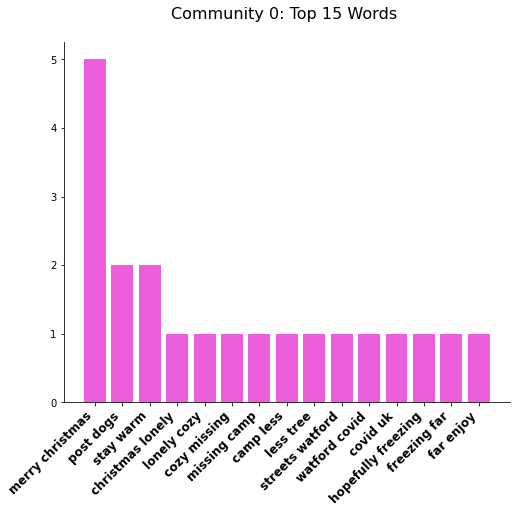

C:\Users\faii_\AppData\Local\Temp\ipykernel_16184\157801635.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize=12, fontweight='semibold')


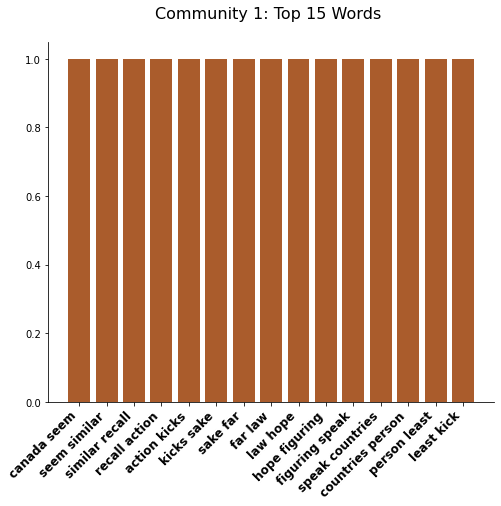

C:\Users\faii_\AppData\Local\Temp\ipykernel_16184\157801635.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize=12, fontweight='semibold')


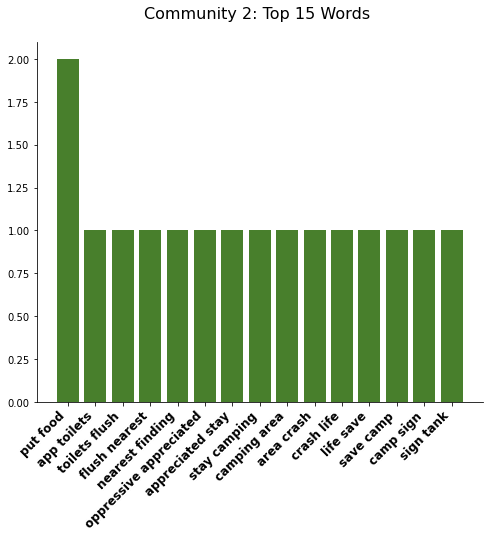

C:\Users\faii_\AppData\Local\Temp\ipykernel_16184\157801635.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize=12, fontweight='semibold')


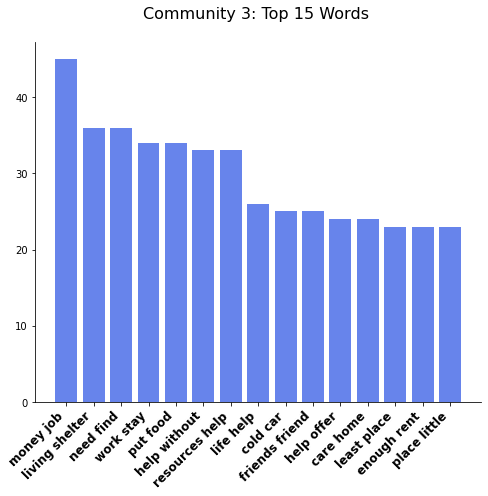

C:\Users\faii_\AppData\Local\Temp\ipykernel_16184\157801635.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize=12, fontweight='semibold')


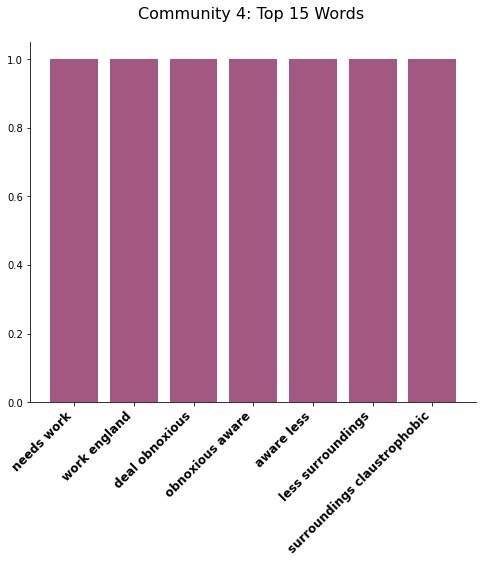

C:\Users\faii_\AppData\Local\Temp\ipykernel_16184\157801635.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize=12, fontweight='semibold')


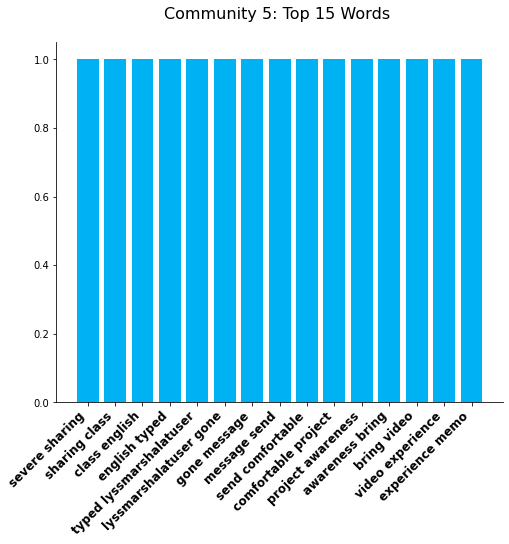

C:\Users\faii_\AppData\Local\Temp\ipykernel_16184\157801635.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize=12, fontweight='semibold')


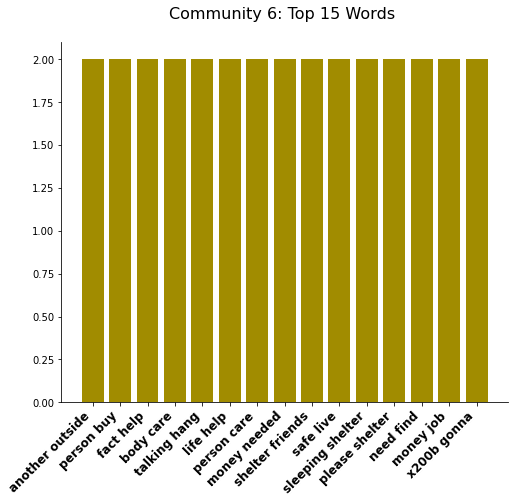

C:\Users\faii_\AppData\Local\Temp\ipykernel_16184\157801635.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize=12, fontweight='semibold')


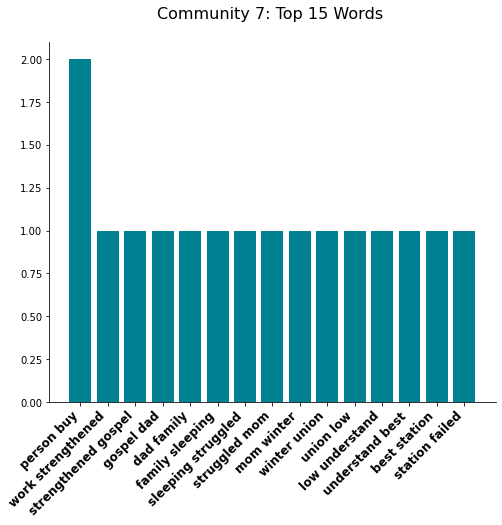

C:\Users\faii_\AppData\Local\Temp\ipykernel_16184\157801635.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize=12, fontweight='semibold')


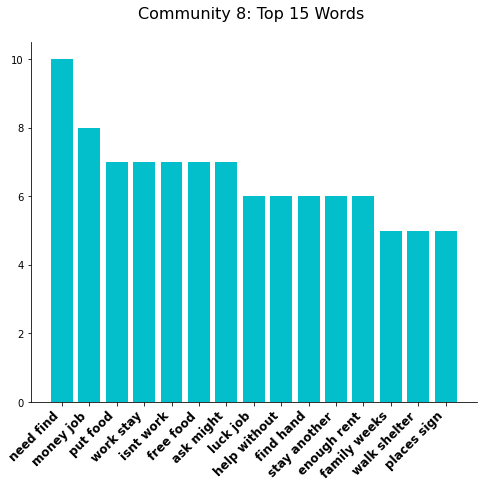

C:\Users\faii_\AppData\Local\Temp\ipykernel_16184\157801635.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize=12, fontweight='semibold')


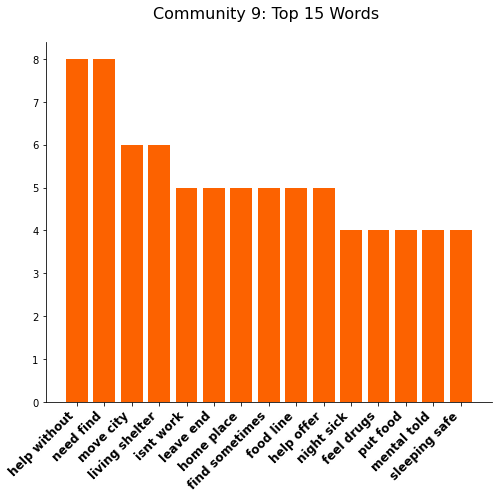

C:\Users\faii_\AppData\Local\Temp\ipykernel_16184\157801635.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize=12, fontweight='semibold')


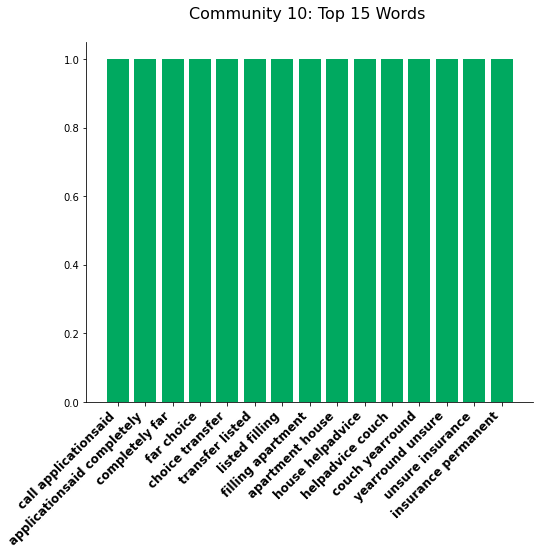

C:\Users\faii_\AppData\Local\Temp\ipykernel_16184\157801635.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize=12, fontweight='semibold')


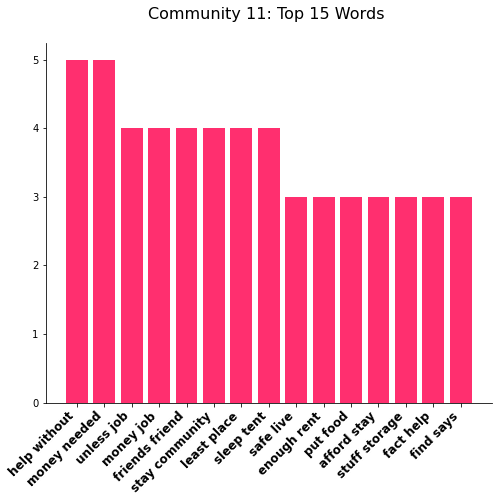

C:\Users\faii_\AppData\Local\Temp\ipykernel_16184\157801635.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize=12, fontweight='semibold')


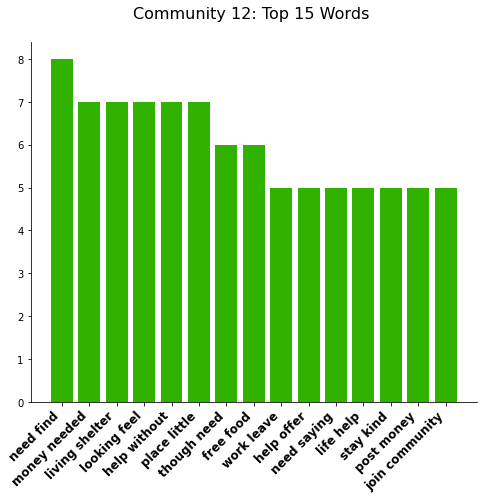

In [59]:
drawBarCharts(community_ngrams)

In [119]:
# repeated_topics = {}
# for community_id, ngrams in community_ngrams.items():
#     for topic, count in ngrams.items():
#         if count > 1:
#             if community_id not in repeated_topics:
#                 repeated_topics[community_id] = []
#             repeated_topics[community_id].append(topic)

# for community_id, topics in repeated_topics.items():
#     print(f"Community {community_id} has the following repeated topics: {topics}")


In [157]:
# import matplotlib.pyplot as plt

# # Loop through each community
# for community_id, community_ngrams in community_ngrams.items():

#     # Get the top 10 ngrams and their values
#     top10_ngrams = list(community_ngrams.items())[:10]
#     labels = [ngram[0] for ngram in top10_ngrams]
#     values = [ngram[1] for ngram in top10_ngrams]

#     # Create a pie chart
#     plt.pie(values, labels=labels, autopct='%1.1f%%')
#     plt.title('Community ' + str(community_id) + ' Top 10 Topic Distribution ')
#     plt.axis('equal')
#     plt.show()



In [299]:
veryberryblue_df = content_df[content_df['author'] == 'veryberryblue']
print(veryberryblue_df.count())
display(veryberryblue_df)

,id,content,author,score,Weight,new_Community,Comm_size
21,10vusru,"Am I the only one with ""food fantasies""? Yeah,...",veryberryblue,25,1,8,1024
33,10uv39d,Recommended gear for outdoor/stealth camping? ...,veryberryblue,17,1,3,1530
53,10t2asm,"The Appalachian trail as an ""alternative lifes...",veryberryblue,28,2,3,1530
80,10rfwn2,East or West coast? Which is generally better ...,veryberryblue,4,1,3,1530
88,10qiy3k,Do all states require you to have been a resid...,veryberryblue,8,2,3,1530
99,10ppgr8,Ever been joined by a random animal travel com...,veryberryblue,21,3,3,1530
101,10pl64i,What were your very first steps after becoming...,veryberryblue,19,1,3,1530
110,10ot66d,Medical care that requires an extended stay. H...,veryberryblue,8,1,3,1530
112,10orx4r,Is it possable to make real friends out there?...,veryberryblue,17,2,3,1530
127,10nu05o,Is every place in the states like this?. You w...,veryberryblue,28,1,11,964


In [383]:
community_ngrams = {}


nodes = content_df.index.to_list()
ngrams_content = {}
for node in nodes:
    # generate ngrams for node
    ind_ngrams = generate_N_grams(content_df.loc[node, 'content'], 2 )

    # count ngrams for community
    for i in ind_ngrams:
        if i in ngrams_content.keys():
            ngrams_content[i]+=1
        else:
            ngrams_content[i]=1

community_ngrams[community_id] = ngrams_content
    
top_10_topics = {}
for community_id, ngrams_c_content in community_ngrams.items():
    sorted_ngrams_c_content = sorted(ngrams_c_content.items(), key=operator.itemgetter(1), reverse=True)[:15]
    top_10_topics[community_id] = sorted_ngrams_c_content
print(top_10_topics)


{'id': [('job car', 61), ('money living', 58), ('shelter work', 41), ('stay help', 36), ('rent help', 35), ('help post', 32), ('family help', 32), ('need place', 31), ('job shit', 31), ('care need', 30), ('need hope', 30), ('home live', 29), ('asked money', 29), ('help friends', 29), ('bag sleeping', 29)]}


In [384]:
# import numpy as np
import matplotlib.pyplot as plt

def plotBarChart(r_List, s):

    for i, (community_id, community_ngrams) in enumerate(top_10_topics.items()):

        # Get the top 10 ngrams and their values
        top10_ngrams = sorted(community_ngrams, reverse=True)[:15]
        labels = [ngram[0] for ngram in community_ngrams]
        values = [ngram[1] for ngram in community_ngrams]

        # Create a bar chart
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.bar(labels, values, color= '#9c9191', fontsize=10, fontweight='bold')
        plt.xticks(rotation=45, ha='right') 
#         plt.xticks(rotation=90)
        plt.title('Top 15 Words in Text Corpus \n', fontsize=16)
        plt.subplots_adjust(top=0.75)
        plt.show()

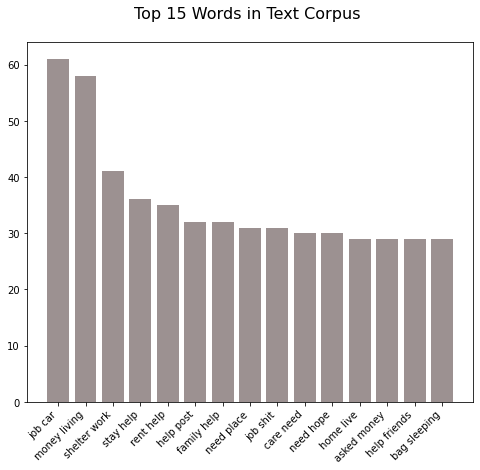

In [385]:
plotBarChart(top_10_topics, "Top 20 Most Frequent Words")

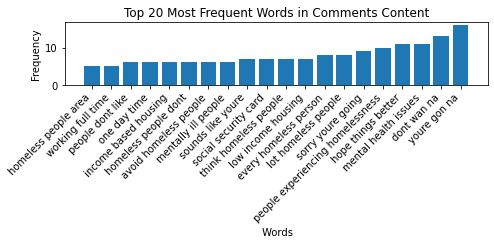

In [50]:
plotBarChart(top_20_Comment_Content, "Top 20 Most Frequent Words in Comments Content")

In [401]:
def find_author_info(name, df):
    # Filter the dataframe by author name
    author_df = df[df['author'] == name]
    
    # Count the unique id of each communication
    count_comm = author_df['id'].nunique()
    
    # Find the unique communities the author belongs to
    unique_communities = author_df['new_Community'].unique()
    
    # Find the content of their highest scored comment/post
    highest_scored_content = author_df.loc[author_df['score'].idxmax(), 'content']
    
    # Return a dictionary with the author's information
    author_info = {'name': name,
                   'count_communications': count_comm,
                   'unique_communities': unique_communities,
                   'highest_scored_content': highest_scored_content}
    
    return author_info


In [402]:
# Example usage
author_info = find_author_info('veryberryblue', content_df)
print(author_info)


{'name': 'veryberryblue', 'count_communications': 44, 'unique_communities': array([ 8,  3, 11,  6, 12], dtype=int64), 'highest_scored_content': 'deal home car job weekly bbqs living normal life assures fall difficult times let stay help financially rides needed yeah going right point divorce illness death jobhouse loss like warm fuzzy talk goes away people start passing buck making excuses suddenly feel abandoned single person turn'}


In [403]:
author_info = find_author_info('Grassyhobo', content_df)
print(author_info)

{'name': 'Grassyhobo', 'count_communications': 93, 'unique_communities': array([ 3, 12,  8, 11], dtype=int64), 'highest_scored_content': 'lost camp bulldozer showed torn venting'}


In [404]:
author_info = find_author_info('MrArmenian', content_df)
print(author_info)

{'name': 'MrArmenian', 'count_communications': 29, 'unique_communities': array([ 3, 12, 11,  9,  2,  6], dtype=int64), 'highest_scored_content': 'know ive homeless traveler years recently checked shelter eugene oregon sober today officially marks month sobriety mark heres coffee cigarettes boost moral morning know ive homeless traveler years recently checked shelter eugene oregon sober today officially marks month sobriety mark heres coffee cigarettes boost moral morning'}


In [405]:
author_info = find_author_info('Liquidmemer', content_df)
print(author_info)

{'name': 'Liquidmemer', 'count_communications': 28, 'unique_communities': array([ 0,  3, 11, 12,  9], dtype=int64), 'highest_scored_content': 'thankful places like abandoned wifi near power thankful places like abandoned wifi near power'}
